# 导入数据      
H5游戏训练集 热血 

In [1]:
# dmp
import pandas as pd
import numpy as np

def read_traindata(data_path):
    '''
    @param data_path:训练集路径
    return：train_data, train_label 训练集数据，训练集标签
    
    '''
    # 导入训练集
    train_data_label = pd.read_table(data_path, sep='\001',header=None, index_col=0)
#     train_data_label = train_data_label.replace('\\N', np.nan)
    train_data_label = train_data_label.replace('\\N', np.nan)
    train_m, train_n = train_data_label.shape
    train_data = train_data_label.ix[:, :train_n-1]
    train_label = train_data_label.ix[:, train_n]
    return train_data, train_label


data_path = r'D:\work\Precision_marketing\gameover\chuangqi\chuangqi_click_train_data'
train_data, train_label = read_traindata(data_path)
columns_list = ['sex', 'age', 'province', 'ctype', 'osbrand', 'nettype', 'state', 'ontime', 'paytype', 'act_type', 'owe', 'brand',   
                'bus', 'fuse', 'dealmonth', 'flowp', 'flowc', 'flowc_half', 'net', 'score', 'flag', 'flow', 'sum_flow2', 'sum_flow3',  
                'sum_flow4', 'sum_flow5', 'sum_flow6', 'revenue', 'sum_revenue2', 'sum_revenue3', 'sum_revenue4',  
                'sum_revenue5', 'sum_revenue6', 'reg_time', 'comp_id', 'ter_id', 'copycat_flag', 'thematic', 'office', 'security',  
                'photo', 'news', 'traffic', 'browser', 'social', 'system', 'service', 'video', 'shopping', 'input', 'chat', 'financial', 'reader',  
                'audio', 'game', 'other', 'spe_p2p', 'sep_finance', 'spe_car', 'sep_2hand_car', 'sep_eat_chicken', 'spe_king_glory',  
                'photo_top5', 'news_top5', 'social_top5', 'video_top5', 'shopping_top5', 'financial_top5', 'audio_top5'  ]

# columns_list = ['assur_type', 'contract', 'viplevel', 'flow'
#                    , 'revenue', 'net', 'province', 'city', 'ctype', 'ontime'
#                    , 'state', 'brand', 'bus', 'product', 'fuse'
#                    , 'dealmonth', 'paytype', 'act_type', 'owe', 'sex'
#                    , 'age', 'flowp', 'flowc', 'score', 'os'
#                    , 'osbrand', 'nettype']

train_data.columns = columns_list
train_data.head()

D:\anzhuang\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


,sex,age,province,ctype,osbrand,nettype,state,ontime,paytype,act_type,...,sep_2hand_car,sep_eat_chicken,spe_king_glory,photo_top5,news_top5,social_top5,video_top5,shopping_top5,financial_top5,audio_top5
0,,,,,,,,,,,,,,,,,,,,,
13001558764,2,5,21,1,1,2,1,6,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13001681845,1,6,21,2,2,3,1,8,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13002226728,2,5,26,2,2,3,1,8,1,2,...,0,0,0,0,0,1,1,1,0,0
13002303404,2,5,31,2,4,3,1,8,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13002307070,1,5,31,1,9,2,1,8,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 数据正负类各有多少数据

In [2]:
train_label.value_counts()

0    369998
1     19805
Name: 70, dtype: int64

In [22]:
369998/19805

18.682049987376924

## 统计各特征的缺失值情况,缺失值占比超过80%的特征删除

In [269]:
for col in columns_list:
    v = train_data[col].isnull().value_counts()
    try:
        print ('%s 缺失值占比：%0.2f' % (col, 1 - v[False]/v.sum()))
    except:
        print ('%s 缺失值占比：%0.2f' % (col, 1.0))

assur_type 缺失值占比：1.00
contract 缺失值占比：0.85
viplevel 缺失值占比：1.00
flow 缺失值占比：0.00
revenue 缺失值占比：0.00
net 缺失值占比：0.98
province_num 缺失值占比：0.00
city_num 缺失值占比：0.00
ctype_num 缺失值占比：0.00
ontime_num 缺失值占比：0.00
state_num 缺失值占比：0.00
brand_num 缺失值占比：0.00
bus_num 缺失值占比：0.00
product_num 缺失值占比：0.00
fuse_num 缺失值占比：0.02
dealmonth_num 缺失值占比：0.00
paytype_num 缺失值占比：0.00
act_type_num 缺失值占比：0.00
owe_num 缺失值占比：0.00
sex_num 缺失值占比：0.00
age_num 缺失值占比：0.00
flowp_num 缺失值占比：0.99
flowc_num 缺失值占比：0.99
score_num 缺失值占比：0.98
os_num 缺失值占比：0.03
osbrand_num 缺失值占比：0.00
nettype_num 缺失值占比：0.00


删除掉缺失值占比80%以上的数据

In [3]:
columns_list = ['sex', 'age', 'province', 'ctype', 'osbrand', 'nettype', 'state', 'ontime', 'paytype', 'act_type', 'owe', 'brand',   
                'bus', 'fuse', 'dealmonth', 'flowp', 'flowc', 'flowc_half', 'net', 'score', 'flag', 'flow', 'sum_flow2', 'sum_flow3',  
                'sum_flow4', 'sum_flow5', 'sum_flow6', 'revenue', 'sum_revenue2', 'sum_revenue3', 'sum_revenue4',  
                'sum_revenue5', 'sum_revenue6', 'reg_time', 'comp_id', 'ter_id', 'copycat_flag']

# columns_list = ['assur_type', 'contract', 'viplevel', 'flow'
#                    , 'revenue', 'net', 'province', 'city', 'ctype', 'ontime'
#                    , 'state', 'brand', 'bus', 'product', 'fuse'
#                    , 'dealmonth', 'paytype', 'act_type', 'owe', 'sex'
#                    , 'age', 'flowp', 'flowc', 'score', 'os'
#                    , 'osbrand', 'nettype']


train_data = train_data[columns_list]
train_data.head()

,sex,age,province,ctype,osbrand,nettype,state,ontime,paytype,act_type,...,revenue,sum_revenue2,sum_revenue3,sum_revenue4,sum_revenue5,sum_revenue6,reg_time,comp_id,ter_id,copycat_flag
0,,,,,,,,,,,,,,,,,,,,,
13001558764,2,5,21,1,1,2,1,6,1,1,...,3,4,5,6,6,7,NaN,NaN,NaN,NaN
13001681845,1,6,21,2,2,3,1,8,1,1,...,2,2,2,2,2,2,NaN,NaN,NaN,NaN
13002226728,2,5,26,2,2,3,1,8,1,2,...,2,2,2,3,3,3,7,2,501,0
13002303404,2,5,31,2,4,3,1,8,1,1,...,2,3,4,5,5,5,5,3,46,0
13002307070,1,5,31,1,9,2,1,8,1,1,...,2,2,2,2,2,2,4,12,501,0


In [ ]:
# 分类离散型特征
discrete_features = ['sex', 'province', 'ctype', 'osbrand', 'nettype', 'state',
                     'paytype', 'act_type', 'owe', 'brand', 'bus', 'fuse', 
                      'flowp', 'flowc', 'flowc_half', 'flag', 'comp_id', 'ter_id', 'copycat_flag']
# 连续特征离散化
continuous_features = ['age', 'ontime', 'dealmonth', 'score', 'flow', 'sum_flow2', 'sum_flow3',  
                'sum_flow4', 'sum_flow5', 'sum_flow6', 'revenue', 'sum_revenue2', 'sum_revenue3', 'sum_revenue4',  
                'sum_revenue5', 'sum_revenue6', 'reg_time']

## 占比分析

D:\anzhuang\anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\anzhuang\anaconda3\lib\site-packages\ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


##################################################
sex
  tag_ename  tag_value tag_cname    tag_num     A全量用户   T_num       0      1  \
0       sex        2.0         女  112972838  0.322993  130279  124051   6228   
1       sex        3.0        未知   29516300  0.084388    6891    6608    283   
2       sex        1.0         男  207279138  0.592618  252633  239339  13294   

      T全量用户       T_1       T_0  
0  0.334218  0.314466  0.335275  
1  0.017678  0.014289  0.017860  
2  0.648104  0.671245  0.646866  
##################################################
age
  tag_ename  tag_value tag_cname    tag_num     A全量用户   T_num       0     1  \
0       age        4.0    29-40岁   92420746  0.264234  115209  109332  5877   
1       age        3.0    18-28岁   88516131  0.253071  120122  114157  5965   
2       age        7.0        未知   29193208  0.083464    6926    6643   283   
3       age        5.0    41-65岁  113338844  0.324040  123252  117016  6236   
4       age        2.0     7-17岁   115

##################################################
nettype
  tag_ename  tag_value tag_cname    tag_num     A全量用户   T_num       0      1  \
0   nettype        4.0        未知   94289058  0.269576      81      79      2   
1   nettype        1.0        2G   41291541  0.118054   30538   29429   1109   
2   nettype        3.0        4G  179084748  0.512010  341606  323470  18136   
3   nettype        2.0        3G   35102929  0.100361   17578   17020    558   

      T全量用户       T_1       T_0  
0  0.000208  0.000101  0.000214  
1  0.078342  0.055996  0.079538  
2  0.876355  0.915728  0.874248  
3  0.045095  0.028175  0.046000  
##################################################
state
  tag_ename  tag_value tag_cname    tag_num     A全量用户     T_num         0  \
0     state        2.0       有效期   42309498  0.120964       NaN       NaN   
1     state        8.0      强制停机    1662339  0.004753       NaN       NaN   
2     state        7.0      其它停机   17694646  0.050590    8305.0    7824.0   
3    

##################################################
flowc_half
    tag_ename  tag_value tag_cname    tag_num     A全量用户     T_num         0  \
0  flowc_half        4.0        其他  284038573  0.812076  389803.0  369998.0   
1  flowc_half        3.0   从未订购流量包   65079597  0.186065       NaN       NaN   
2  flowc_half        2.0    曾订购流量包     650106  0.001859       NaN       NaN   
3  flowc_half        1.0    已订购流量包          0  0.000000       NaN       NaN   

         1  T全量用户  T_1  T_0  
0  19805.0    1.0  1.0  1.0  
1      NaN    NaN  NaN  NaN  
2      NaN    NaN  NaN  NaN  
3      NaN    NaN  NaN  NaN  
##################################################
net
  tag_ename  tag_value tag_cname    tag_num     A全量用户     T_num         0  \
0       net        1.0         是    8299789  0.023729       NaN       NaN   
1       net        0.0         否  341468487  0.976271  389803.0  369998.0   

         1  T全量用户  T_1  T_0  
0      NaN    NaN  NaN  NaN  
1  19805.0    1.0  1.0  1.0  
###############

D:\anzhuang\anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


##################################################
flow
  tag_ename  tag_value    tag_cname    tag_num     A全量用户   T_num       0  \
0      flow        1.0            0  176111612  0.503523   45796   43642   
1      flow        2.0     (0,100M]   36264030  0.103683   43059   41036   
2      flow        7.0    (1G,1.5G]   12950196  0.037026   25620   24341   
3      flow        4.0  (300M,500M]   10638797  0.030418   21130   20026   
4      flow        5.0  (500M,800M]   12129621  0.034680   24747   23476   
5      flow        8.0    (1.5G,2G]    8900383  0.025447   18804   17864   
6      flow        6.0    (800M,1G]    7535844  0.021546   15027   14203   
7      flow        9.0      (2G,5G]   25477694  0.072844   55391   52709   
8      flow       10.0      (5G,+∞)   42682421  0.122034  109060  103180   
9      flow        3.0  (100M,300M]   17068192  0.048800   31169   29521   

      1     T全量用户       T_1       T_0  
0  2154  0.117485  0.108760  0.117952  
1  2023  0.110463  0.102146

##################################################
sum_flow6
    tag_ename  tag_value    tag_cname     tag_num     A全量用户   T_num       0  \
0   sum_flow6       12.0    (12G,15G]   6168727.0  0.023546    9072    8663   
1   sum_flow6        1.0            0  76610557.0  0.292417    5695    5493   
2   sum_flow6        6.0    (800M,1G]   3894461.0  0.014865    4748    4492   
3   sum_flow6       11.0     (8G,12G]  11835218.0  0.045174   17956   17116   
4   sum_flow6       14.0     (20G,+∞)  33968143.0  0.129654   72808   68953   
5   sum_flow6        8.0    (1.5G,2G]   5692600.0  0.021728    7703    7255   
6   sum_flow6        4.0  (300M,500M]   6101489.0  0.023289    5996    5664   
7   sum_flow6        2.0     (0,100M]  46677466.0  0.178164   18898   18123   
8   sum_flow6        3.0  (100M,300M]  10586138.0  0.040406    8919    8467   
9   sum_flow6       13.0    (15G,20G]   7108738.0  0.027134   10682   10234   
10  sum_flow6       10.0      (5G,8G]  15408100.0  0.058812   23824   

##################################################
sum_revenue6
       tag_ename  tag_value    tag_cname     tag_num     A全量用户   T_num  \
0   sum_revenue6        2.0       (0,50]  31919132.0  0.121898   11093   
1   sum_revenue6        7.0    (500,800]  21024214.0  0.080290   31547   
2   sum_revenue6        9.0  (1000,1500]   6416235.0  0.024503    8900   
3   sum_revenue6       10.0    (1500,+∞)   2918348.0  0.011145    3040   
4   sum_revenue6        6.0    (300,500]  37261546.0  0.142300   61446   
5   sum_revenue6        4.0    (100,200]  50655741.0  0.193452   47373   
6   sum_revenue6        8.0   (800,1000]   5605315.0  0.021406    7196   
7   sum_revenue6        1.0            0  36769486.0  0.140421     308   
8   sum_revenue6        5.0    (200,300]  34753742.0  0.132723   51427   
9   sum_revenue6        3.0     (50,100]  34528093.0  0.131861   16888   
10           NaN        0.1          NaN         NaN       NaN  150585   

         0     1     T全量用户       T_1       T_0 

##################################################
ter_id
    tag_ename  tag_value tag_cname    tag_num     A全量用户     T_num         0  \
0      ter_id      163.0   M110178    43924.0  0.000210      30.0      28.0   
1      ter_id      183.0   M101165    86070.0  0.000412      86.0      81.0   
2      ter_id      317.0   M105075    86919.0  0.000416       8.0       8.0   
3      ter_id      368.0  MS177928    39223.0  0.000188      41.0      40.0   
4      ter_id      151.0   M110170    41580.0  0.000199      21.0      20.0   
5      ter_id      272.0   M110165    20941.0  0.000100      10.0       9.0   
6      ter_id      282.0   M194148   109286.0  0.000524     168.0     126.0   
7      ter_id      423.0   M190881    60031.0  0.000288      30.0      27.0   
8      ter_id      377.0   M108119    10691.0  0.000051      13.0      12.0   
9      ter_id      420.0   M191341    65166.0  0.000312      92.0      66.0   
10     ter_id      469.0   M133067    17574.0  0.000084      11.0      11

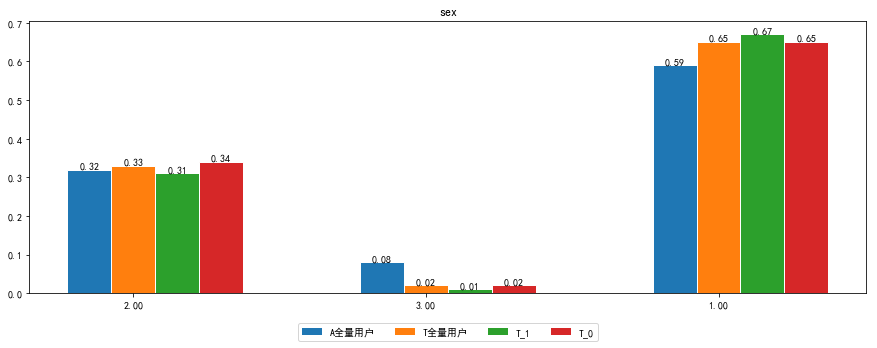

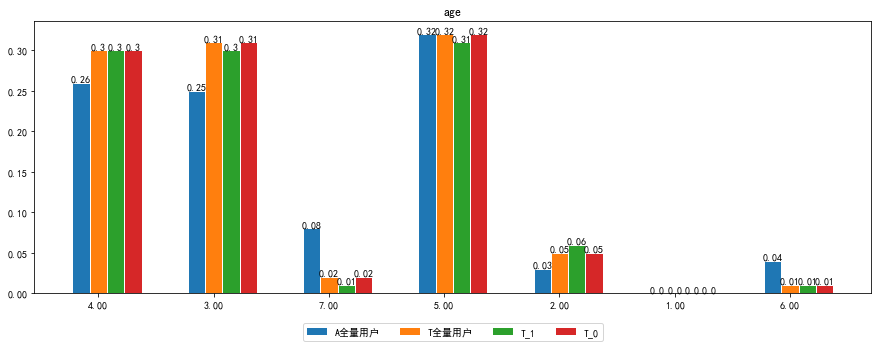

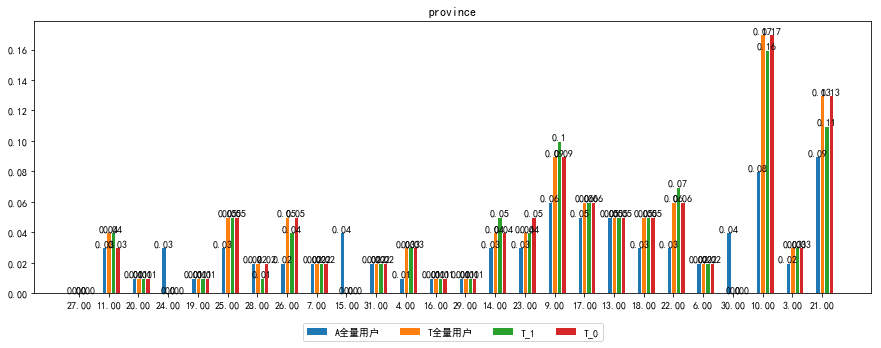

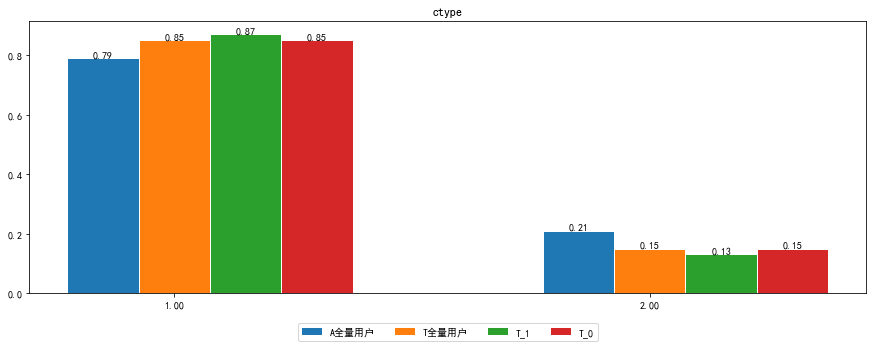

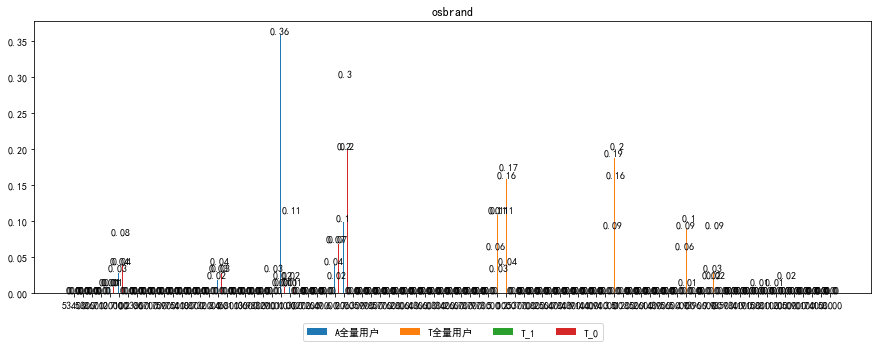

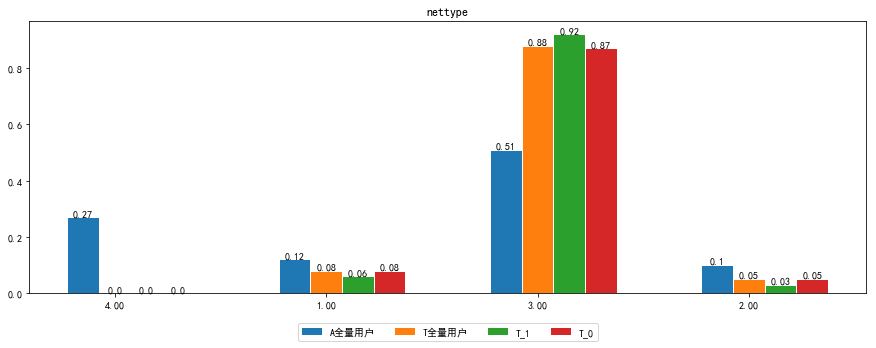

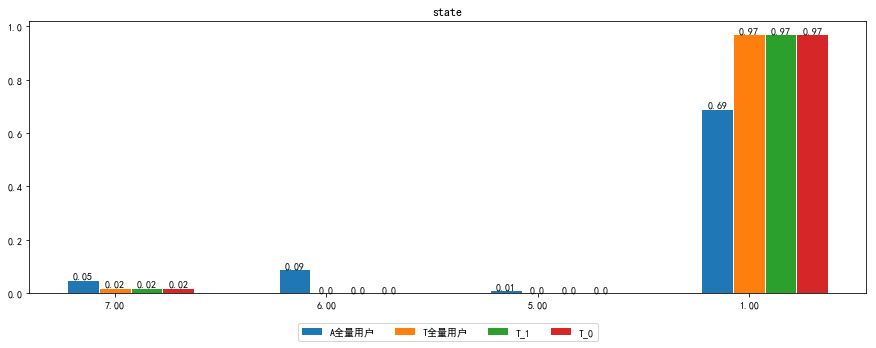

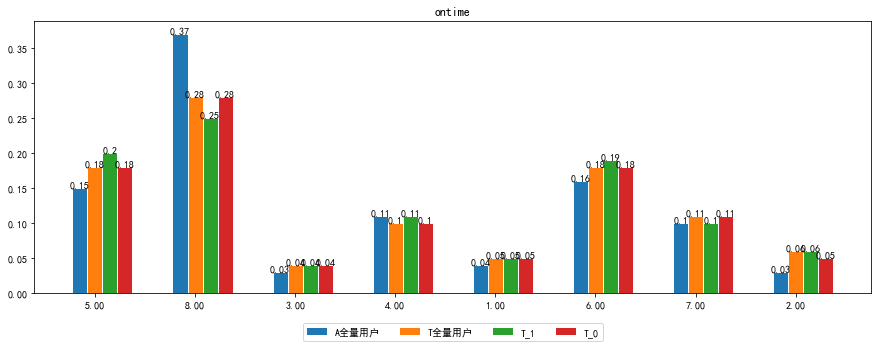

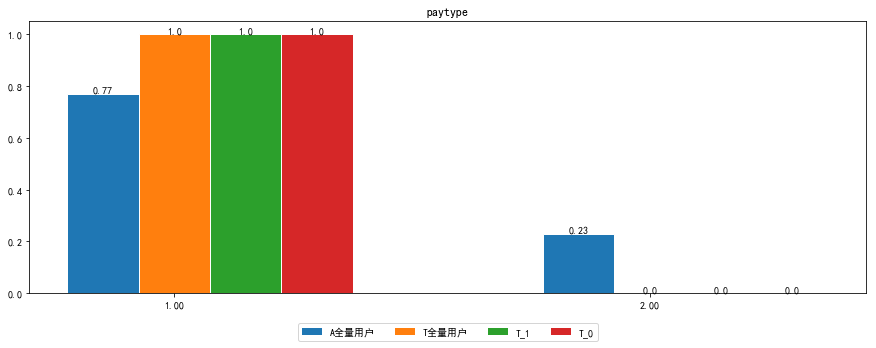

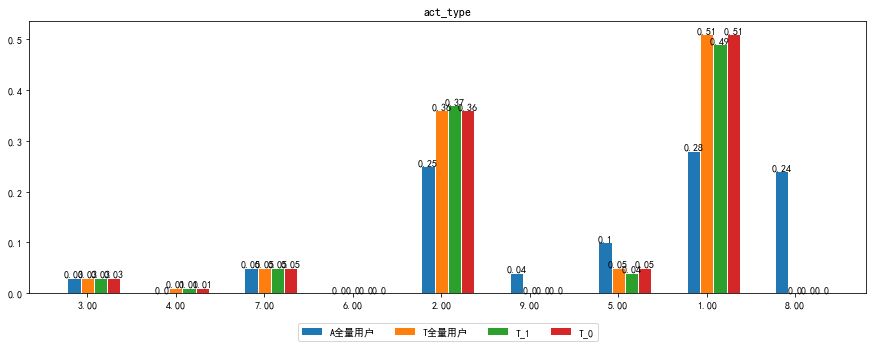

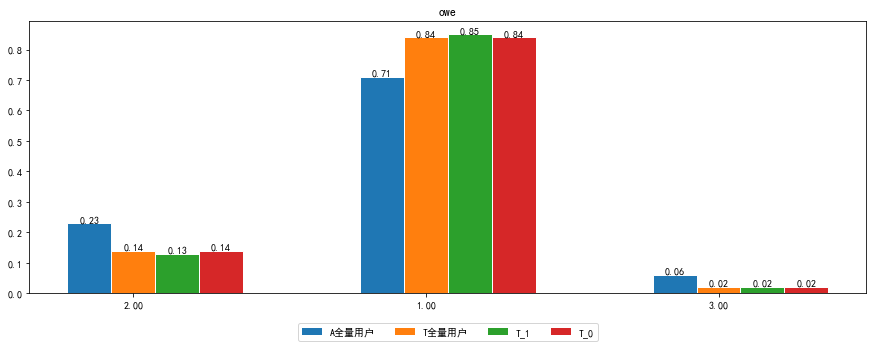

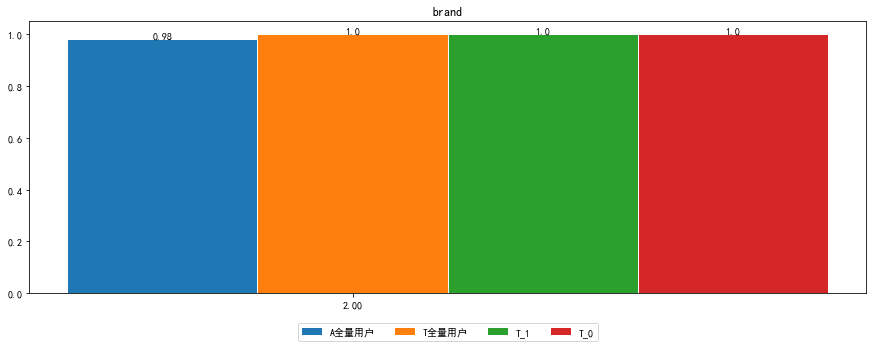

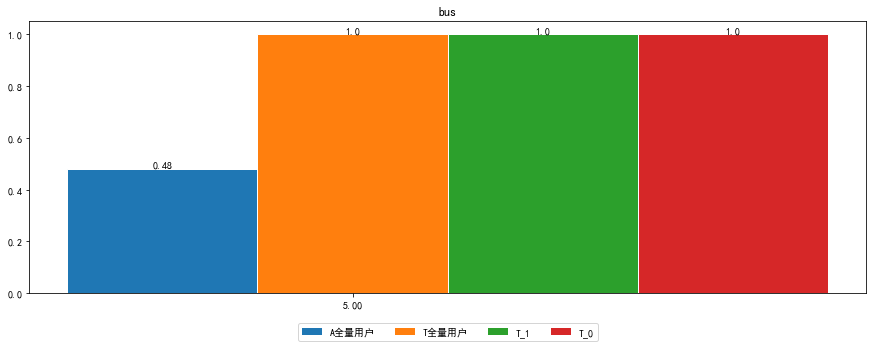

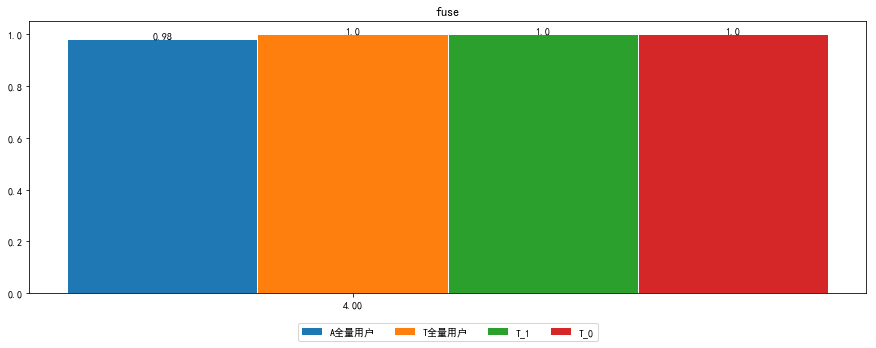

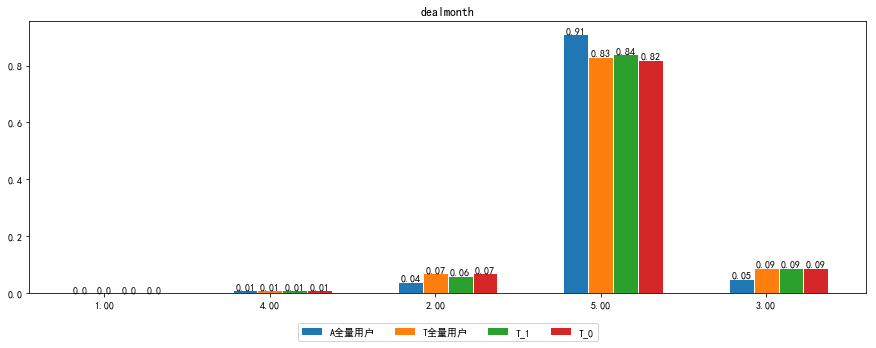

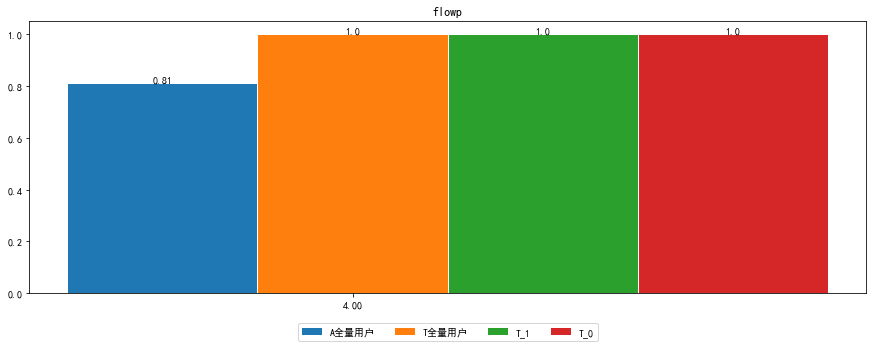

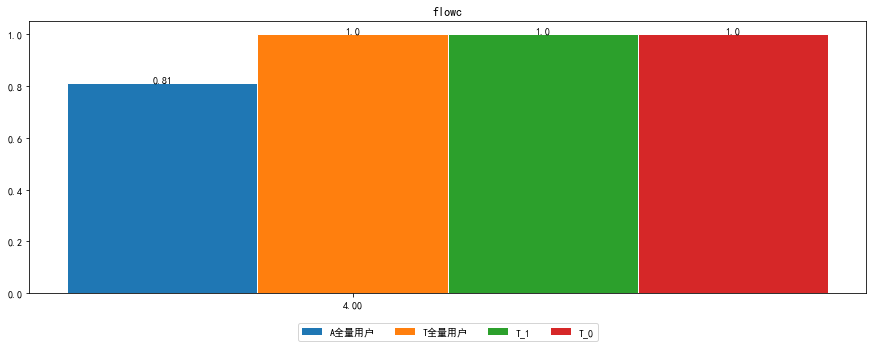

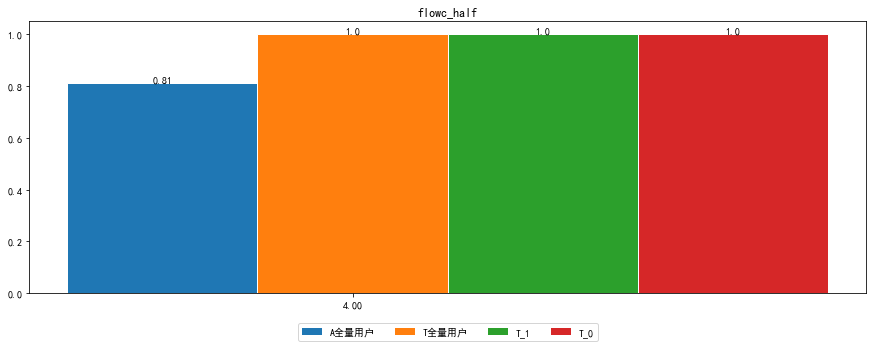

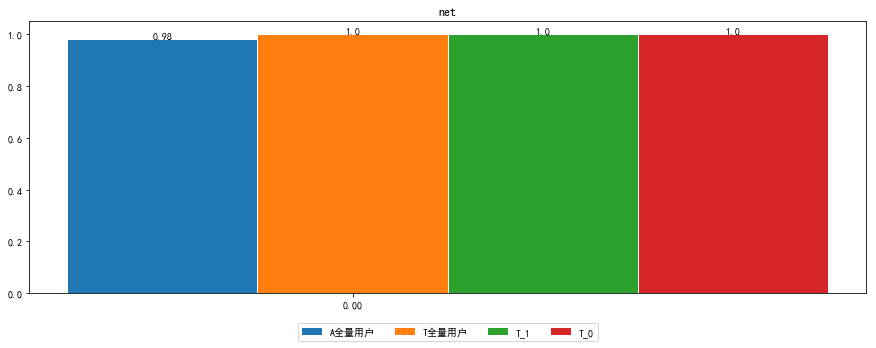

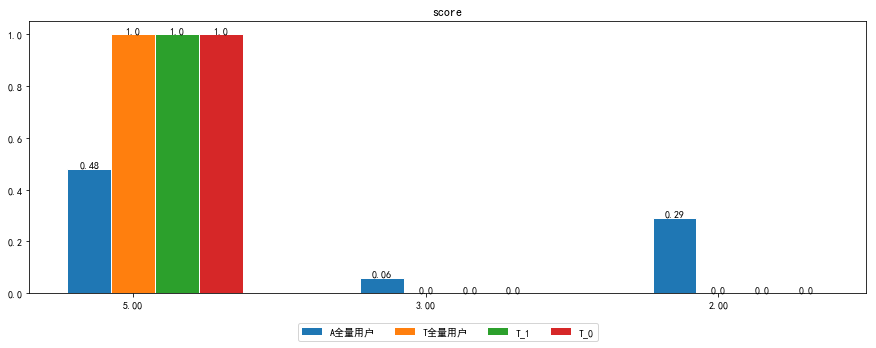

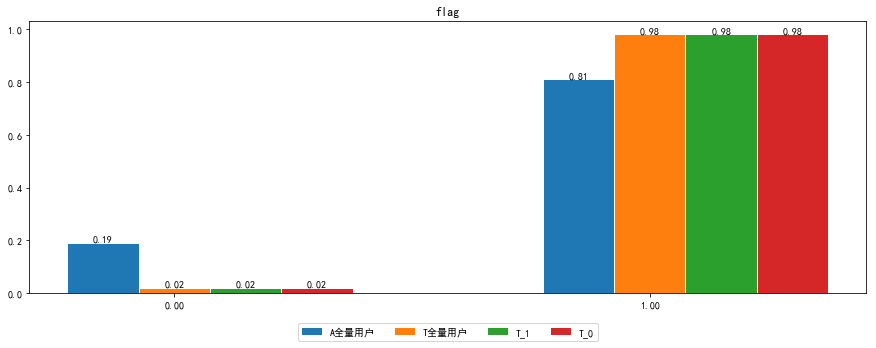

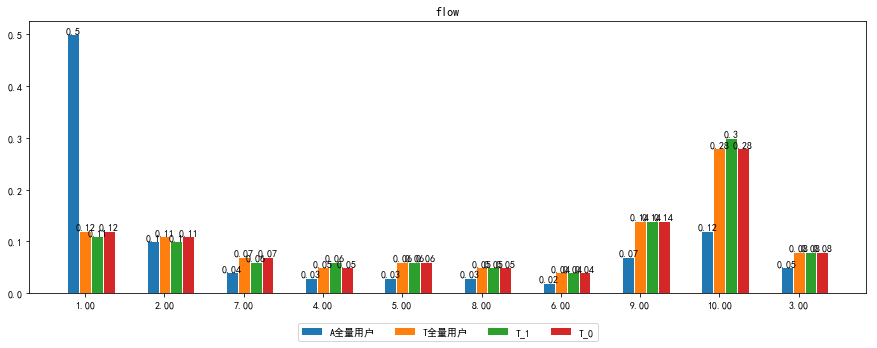

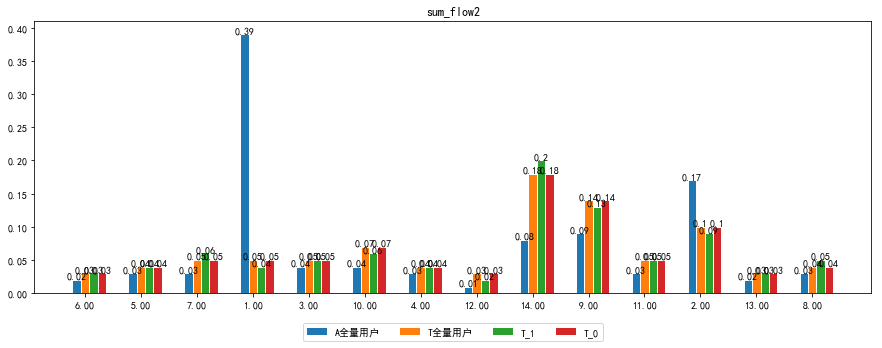

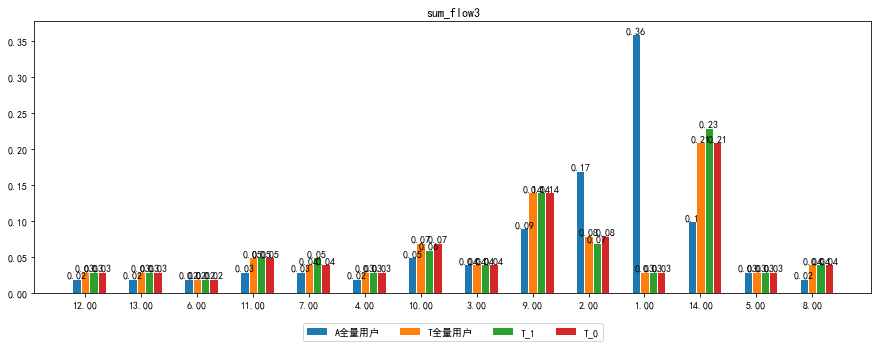

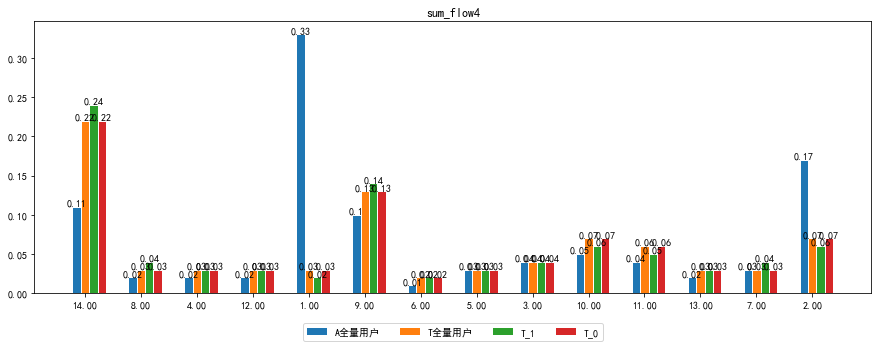

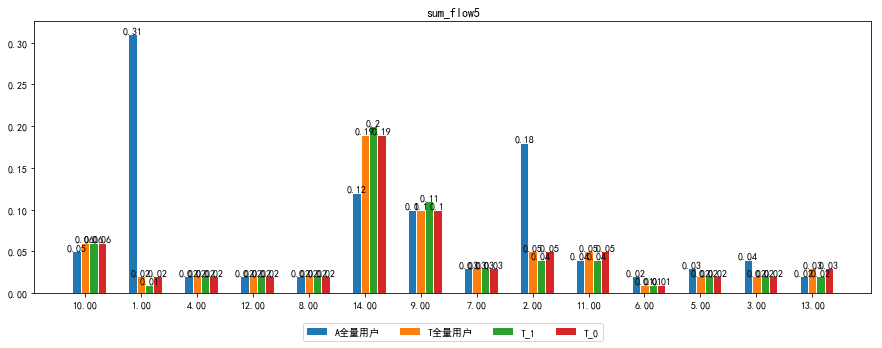

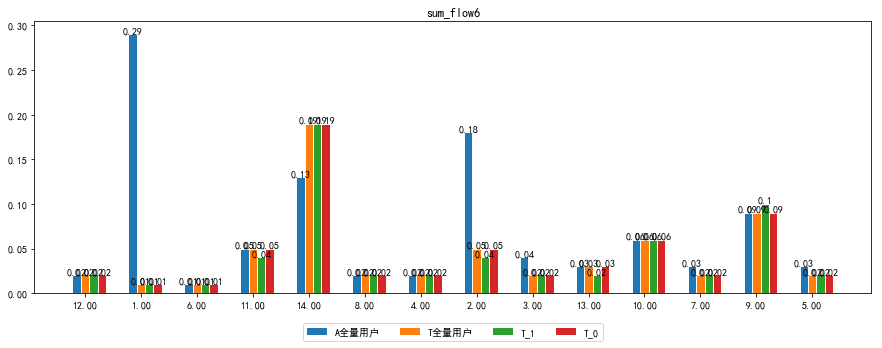

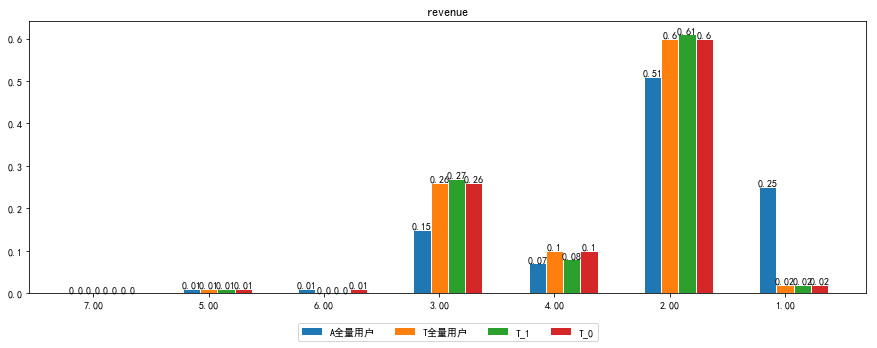

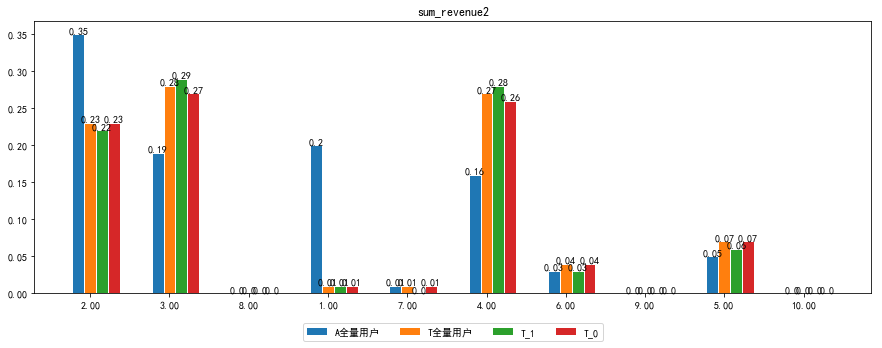

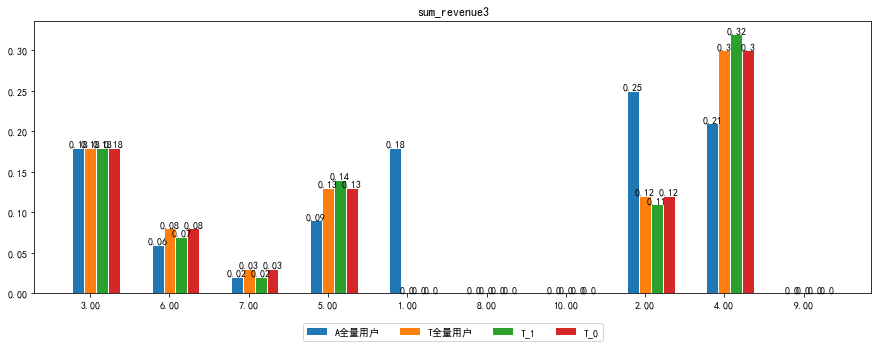

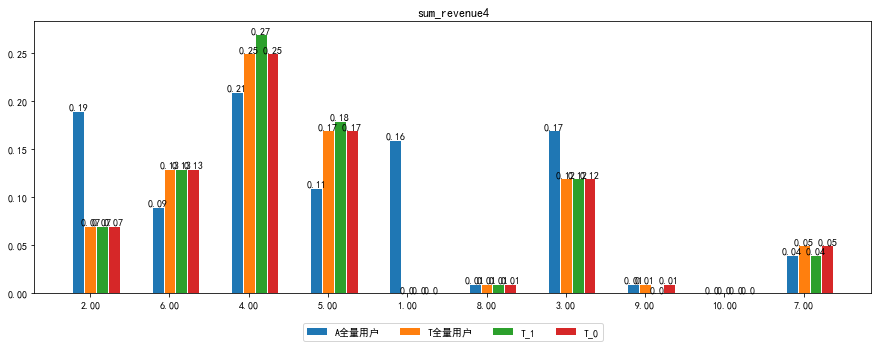

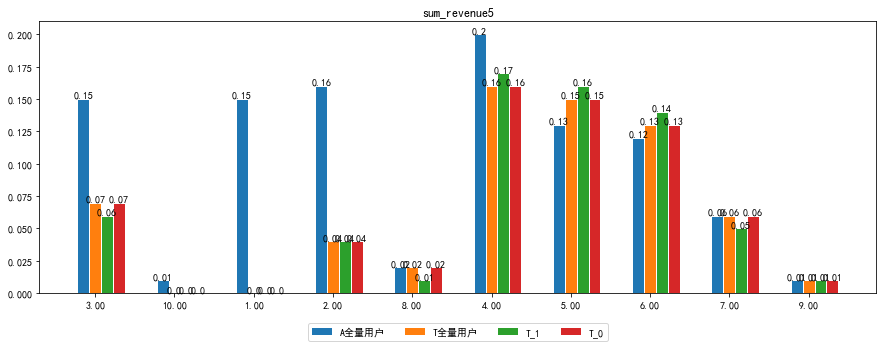

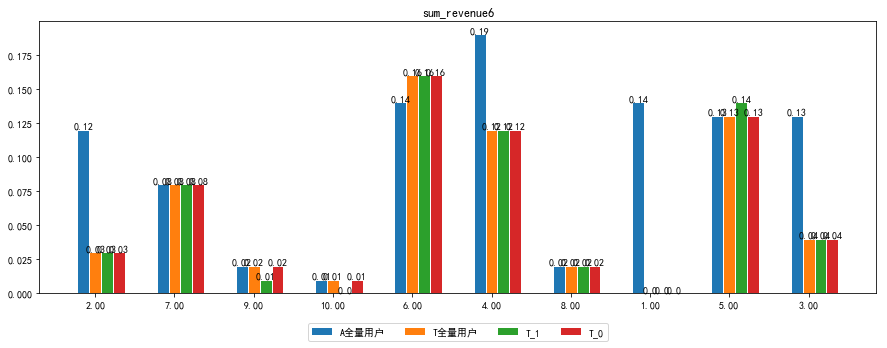

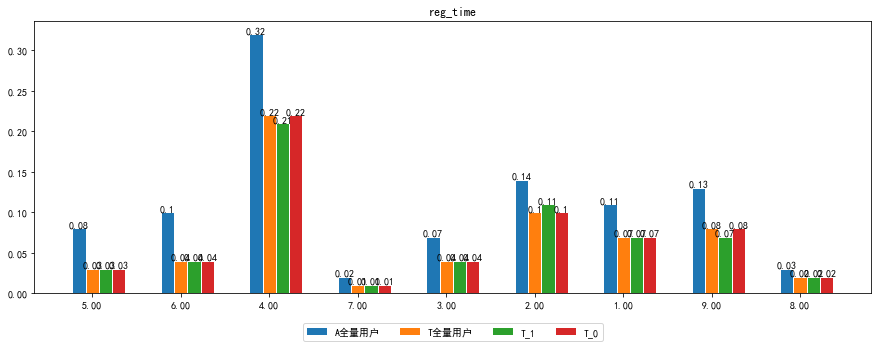

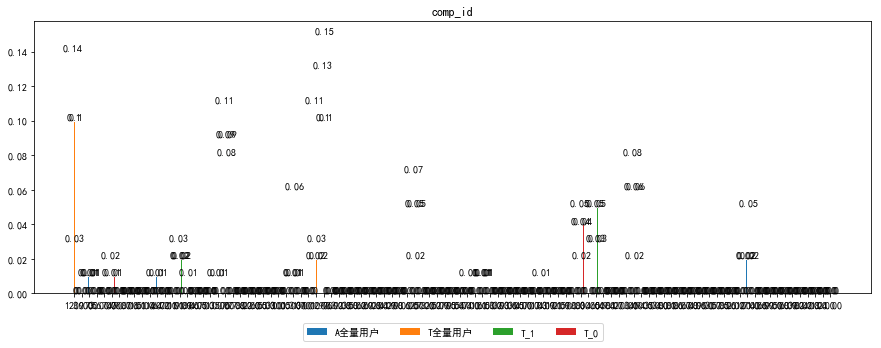

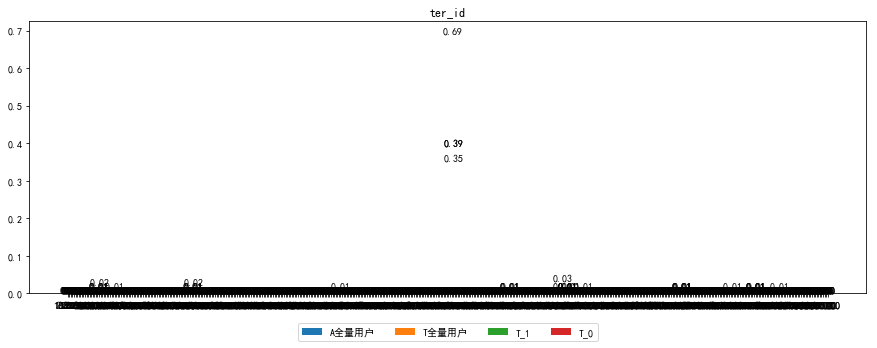

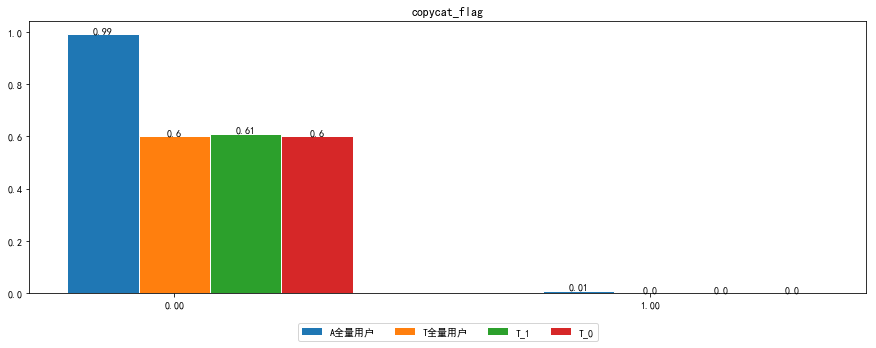

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_bar(v_T, columns):
    v_T = v_T.dropna()
    ''' 画柱状占比对比图'''
    if v_T.shape[0] != 0:
        vvvd = v_T[['A全量用户', 'T全量用户', 'T_1', 'T_0', 'tag_value']]
        formater="{0:.02f}".format  
        vvvd = vvvd.applymap(formater) 
        bar_width = 0.15
        index = np.arange(vvvd.shape[0])
        rects0 = plt.bar(index, vvvd['A全量用户'].values,  bar_width, label='A全量用户')
        rects1 = plt.bar(index + bar_width, vvvd['T全量用户'].values,  bar_width, label='T全量用户')
        rects2 = plt.bar(index + 2 * bar_width, vvvd['T_1'].values,  bar_width, label='T_1')
        rects3 = plt.bar(index + 3 * bar_width, vvvd['T_0'].values,  bar_width, label='T_0')
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.09), fancybox=True, ncol=5)
        # X轴标题
        plt.xticks(index + bar_width, vvvd['tag_value'].values)
        # 图表标题
        plt.title(columns)
        # 添加数据标签
        def add_labels(rects):
            for rect in rects:
                height = rect.get_height()
                plt.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')
                # 柱形图边缘用白色填充，纯粹为了美观
                rect.set_edgecolor('white')

        add_labels(rects0)
        add_labels(rects1)
        add_labels(rects2)
        add_labels(rects3)


# 全国各字段各值的统计用户总数，一个月一更新
china_all_data = pd.read_excel(r'D:\work\Precision_marketing\dmp_sumtags.xlsx')
china_all_data = china_all_data[china_all_data['tag_value'].notnull()]
# 统计各字段各值中所含的用户的占比
# 'flow', 'revenue'为数值的平均值
columns_list = list(train_data.columns.values)

for columns in columns_list:
    one_data = train_data[columns].value_counts()
    v_T = pd.DataFrame(one_data)
    v = pd.crosstab(train_data[columns], train_label)
    v_T = v_T.join(v)
    v_T['tag_value'] = v_T.index
    v_T['tag_value'] = v_T['tag_value'].astype(float)
    v_T.rename(columns={columns:'T_num'}, inplace = True)

    v_T['T全量用户'] = v_T['T_num']/v_T['T_num'].sum()
    v_T['T_1'] = v_T[1] / v_T[1].sum()
    v_T['T_0'] = v_T[0] / v_T[0].sum()
    
    
    v_A = china_all_data[china_all_data['tag_ename'] == columns]
    v_A['tag_value'] = v_A['tag_value'].astype(float)
    v_A['A全量用户'] = v_A['tag_num']/v_A['tag_num'].sum()
    v_A_T = v_A.merge(v_T, left_on='tag_value', right_on='tag_value', how='outer')


    print ('##################################################')
    print (columns)
    print (v_A_T)
    plt.figure(figsize=(15, 5))
    plot_bar(v_A_T, columns)


## 填充缺失值，填-1，将缺失作为单独的值进行处理

In [4]:
train_data.fillna(0.1, inplace=True)
train_data.head()

,sex,age,province,ctype,osbrand,nettype,state,ontime,paytype,act_type,...,revenue,sum_revenue2,sum_revenue3,sum_revenue4,sum_revenue5,sum_revenue6,reg_time,comp_id,ter_id,copycat_flag
0,,,,,,,,,,,,,,,,,,,,,
13001558764,2,5,21,1,1,2,1,6,1,1,...,3,4,5,6,6,7,0.1,0.1,0.1,0.1
13001681845,1,6,21,2,2,3,1,8,1,1,...,2,2,2,2,2,2,0.1,0.1,0.1,0.1
13002226728,2,5,26,2,2,3,1,8,1,2,...,2,2,2,3,3,3,7,2,501,0
13002303404,2,5,31,2,4,3,1,8,1,1,...,2,3,4,5,5,5,5,3,46,0
13002307070,1,5,31,1,9,2,1,8,1,1,...,2,2,2,2,2,2,4,12,501,0


In [52]:
des = train_data.describe()
des

,sex,age,province,ctype,osbrand,nettype,state,ontime,paytype,act_type,...,fuse,dealmonth,flowp,flowc,flowc_half,net,score,flag,flow,revenue
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,...,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.0,4500.000000,4500.000000,4500.000000,4500.000000
mean,1.266667,3.825111,16.851556,1.208444,9.366667,2.949556,1.252667,6.972000,1.018000,1.596222,...,3.999111,4.348000,3.982000,3.982000,3.982000,0.0,4.867778,0.981333,6.117333,2.847111
std,0.462412,0.952689,7.618645,0.406241,17.683022,0.350768,1.143389,1.597569,0.132966,1.307844,...,0.047137,1.116769,0.132966,0.132966,0.132966,0.0,0.660431,0.135360,3.339900,1.066870
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,3.000000,3.000000,3.000000,0.0,1.000000,0.000000,1.000000,1.000000
25%,1.000000,3.000000,10.000000,1.000000,3.000000,3.000000,1.000000,7.000000,1.000000,1.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,0.0,5.000000,1.000000,3.000000,2.000000
50%,1.000000,4.000000,17.000000,1.000000,5.000000,3.000000,1.000000,8.000000,1.000000,1.000000,...,4.000000,5.000000,4.000000,4.000000,4.000000,0.0,5.000000,1.000000,7.000000,3.000000
75%,2.000000,5.000000,23.000000,1.000000,8.000000,3.000000,1.000000,8.000000,1.000000,2.000000,...,4.000000,5.000000,4.000000,4.000000,4.000000,0.0,5.000000,1.000000,9.000000,4.000000
max,3.000000,7.000000,31.000000,2.000000,101.000000,4.000000,7.000000,8.000000,2.000000,9.000000,...,4.000000,5.000000,4.000000,4.000000,4.000000,0.0,5.000000,1.000000,10.000000,7.000000


查看方差值，如果方差接近0，就是说样本在这个特征上基本上没有差异，这个特征对于样本的区分并没有什么用。

In [55]:
des.loc['std']

sex            0.462412
age            0.952689
province       7.618645
ctype          0.406241
osbrand       17.683022
nettype        0.350768
state          1.143389
ontime         1.597569
paytype        0.132966
act_type       1.307844
owe            0.554694
brand          0.021080
bus            0.642517
fuse           0.047137
dealmonth      1.116769
flowp          0.132966
flowc          0.132966
flowc_half     0.132966
net            0.000000
score          0.660431
flag           0.135360
flow           3.339900
revenue        1.066870
Name: std, dtype: float64

In [56]:
# 删除特征net
del train_data['net']

## 对分类型的离散特征进行one-hot 编码


因为，分类器往往默认数据数据是连续的（可以计算距离？），           
并且是有序的（而上面这个0并不是说比1要高级）。             
但是，按照我们上述的表示，数字并不是有序的，而是随机分配的。

注意: 对于树模型，就不需要进行one-hot编码，           
对于决策树来说，one-hot的本质是增加树的深度         
tree-model是在动态的过程中生成类似 One-Hot + Feature Crossing 的机制            
1. 一个特征或者多个特征最终转换成一个叶子节点作为编码 ，one-hot可以理解成三个独立事件              
2. 决策树是没有特征大小的概念的，只有特征处于他分布的哪一部分的概念           

In [ ]:
# 分类离散型特征
# discrete_features = ['sex', 'province', 'ctype', 'osbrand', 'nettype', 'state',
#                      'paytype', 'act_type', 'owe', 'brand', 'bus', 'fuse', 
#                       'flowp', 'flowc', 'flowc_half', 'flag', 'comp_id', 'ter_id', 'copycat_flag']
# # 连续特征离散化
# continuous_features = ['age', 'ontime', 'dealmonth', 'score', 'flow', 'sum_flow2', 'sum_flow3',  
#                 'sum_flow4', 'sum_flow5', 'sum_flow6', 'revenue', 'sum_revenue2', 'sum_revenue3', 'sum_revenue4',  
#                 'sum_revenue5', 'sum_revenue6', 'reg_time']

## 使用随机森林

### 用验证曲线validation curve 选择超参数

验证曲线和学习曲线的区别是，横轴为某个超参数的一系列值，由此来看不同参数设置下模型的准确率，而不是不同训练集大小下的准确率。          
从验证曲线上可以看到随着超参数设置的改变，模型可能从欠拟合到合适再到过拟合的过程，进而选择一个合适的设置，来提高模型的性能。                 
需要注意的是如果我们使用验证分数来优化超参数，那么该验证分数是有偏差的，它无法再代表模型的泛化能力，我们就需要使用其他测试集              
来重新评估模型的泛化能力。           
不过有时画出单个超参数与训练分数和验证分数的关系图，有助于观察该模型在相应的超参数取值时，是否有过拟合或欠拟合的情况发生。         


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn import metrics


X = train_data.values
print(X.shape)
y = train_label.values 

# rf0 = RandomForestClassifier(oob_score=True, random_state=10)
# rf0.fit(X,y)
# print (rf0.oob_score_)
# y_predprob = rf0.predict_proba(X)[:,1]
# print ("AUC Score (Train): %f" % metrics.roc_auc_score(y, y_predprob) )

(389803, 37)


In [17]:
# 调随机森林的树的个数
def plot_validation_curve(estimator, X, y, param_name, param_range, cv=None, scoring="roc_auc",
                        n_jobs=4):
    
    '''
    验证曲线
    
    '''
    train_scores, test_scores = validation_curve(estimator, X, y, param_name=param_name, 
                                                 param_range=param_range, cv=cv, scoring=scoring, n_jobs=n_jobs) 

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with RandomForestClassifier")
    plt.xlabel("\n_estimators")
    plt.ylabel("roc_auc")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.grid(True)  
    plt.show()
    
    
    


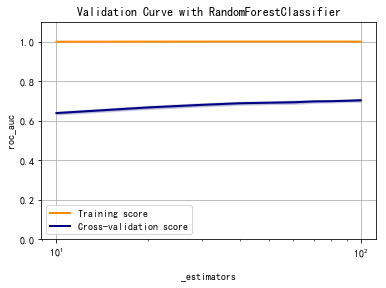

In [10]:
# 调整树的个数
estimator = RandomForestClassifier()  #max_depth = 5, class_weight = {0:0.1, 1:0.5}
param_name="n_estimators"
param_range = np.array(list(range(10,101,10)))

plot_validation_curve(estimator, X, y, param_name, param_range, cv=10, scoring="roc_auc")

随着树的个数的增加，训练集的auc不变、测试集的auc有轻微的上升，           
但模型还是过拟合，所以树可设置一固定值，选择100

[10 15 20 25 30 35 40 45 50 55 60 65]


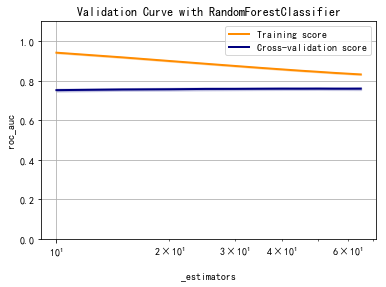

In [18]:
# 调整树的最小叶子节点数
estimator = RandomForestClassifier(n_estimators=100)  #max_depth = 5, class_weight = {0:0.1, 1:0.5}
param_name="min_samples_leaf"
param_range = np.array(list(range(10,70,5)))
print (param_range)
plot_validation_curve(estimator, X, y, param_name, param_range, cv=10, scoring="roc_auc")

In [149]:
param_range

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

随着树的最小叶子节点数的增加，训练集的auc逐渐下降、测试集的auc有逐渐上升，        
但两者的auc值还是相差比较大，模型还是过拟合

In [ ]:
# 调整树的深度

estimator = RandomForestClassifier(n_estimators=100, min_samples_leaf=10)  #max_depth = 5, class_weight = {0:0.1, 1:0.5}
param_name="max_depth"
param_range = np.array(list(range(5,20,2)))

plot_validation_curve(estimator, X, y, param_name, param_range, cv=10, scoring="roc_auc")

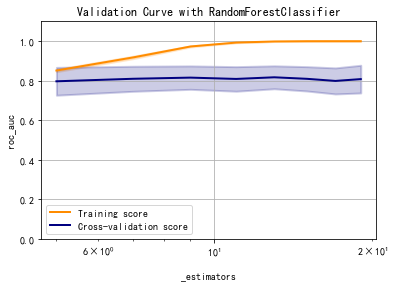

In [349]:
estimator = RandomForestClassifier(n_estimators=100)  #max_depth = 5, class_weight = {0:0.1, 1:0.5}
param_name="max_depth"
param_range = np.array(list(range(5,20,2)))

plot_validation_curve(estimator, X, y, param_name, param_range, cv=10, scoring="roc_auc")

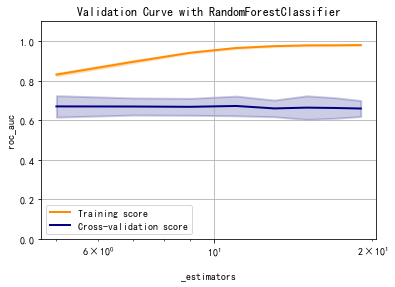

In [161]:
# 调整树的深度

estimator = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, class_weight = {0:1, 1:15})  #max_depth = 5, class_weight = {0:0.1, 1:0.5}
param_name="max_depth"
param_range = np.array(list(range(5,20,2)))

plot_validation_curve(estimator, X, y, param_name, param_range, cv=10, scoring="roc_auc")

不管怎么调整模型的参数，过拟合的问题始终存在.    
由于是非平衡数据集，后面尝试使用采样的方法，看能否避免过拟合

### 学习曲线判断过拟合

In [8]:

%matplotlib inline
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn import metrics

In [6]:
def plot_learning_curve(estimator, X, y, cv=None, train_sizes=None, scoring="roc_auc",
                        n_jobs=4):
    '''
    学习曲线
    '''
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y,
                    cv=cv, n_jobs=n_jobs, scoring=scoring, train_sizes=train_sizes)


    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("roc_auc")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(train_sizes, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(train_sizes, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")

    
    
# train_sizes = np.linspace(.1, 1.0, 8)    
# estimator = RandomForestClassifier(n_estimators=100)
# # estimator = tree.DecisionTreeClassifier() 
# plot_learning_curve(estimator, X, y, cv=10, train_sizes=train_sizes, scoring="roc_auc")
    

从学习曲线上，发现随着样本量的增加，训练集上的得分有一定程度的下降，交叉验证集上的得分有一定程度的上升，    
但总体说来，两者之间有很大的差距，训练集上的准确度远高于交叉验证集。这其实意味着我们的模型处于过拟合的   
状态，也即模型太努力地刻画训练集，一不小心把很多噪声的分布也拟合上了，导致在新数据上的泛化能力变差了。    
   
针对过拟合，有几种办法可以处理：   
* 增大样本量   
* 减少特征的量(只用我们觉得有效的特征)  
* 增强正则化作用



对于本列来说，由于样本量无法增加，首先尝试减少特征的量，如果不行的话，再尝试设置树的深度来防止过拟合

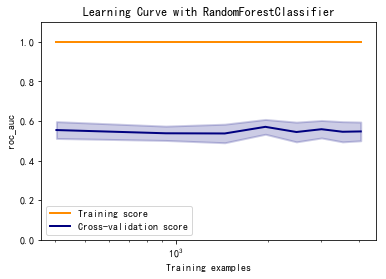

In [162]:
# 采用决策树
train_sizes = np.linspace(.1, 1.0, 8)    
# estimator = RandomForestClassifier()
estimator = tree.DecisionTreeClassifier() 
plot_learning_curve(estimator, X, y, cv=10, train_sizes=train_sizes, scoring="roc_auc")

#### 特征选择（减少特征量）

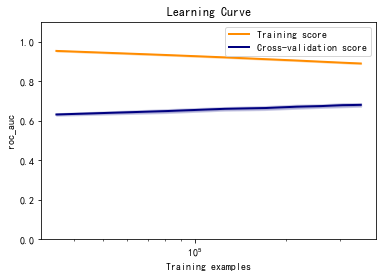

In [10]:
# 采用卡方检验选择10个最优特征
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=5).fit_transform(X, y)
train_sizes = np.linspace(.1, 1.0, 8)    
estimator = RandomForestClassifier()
plot_learning_curve(estimator, X_new, y, cv=10, train_sizes=train_sizes, scoring="roc_auc")

特征选择只选3个特征，还是出现过拟合的现象，下面尝试使用pca降维   
   
PCA是高维环境下能想到的最直接的方案。比如人脸识别，维度往往成千上万，但识别身份的话，       
每个人样本最多也就几十，过拟合现象是很严重的。由此产生了人脸识别早期研究中影响力极大   
的工作eigenface，其实就是先用PCA对人脸图像进行降维，然后再训练分类器。但PCA是无监督的，    
正如Andrew所说：“it does not consider the values of our results y”。所以它虽然能解决    
过拟合问题，但又会带来欠拟合问题。拿人脸识别来说，eigenface虽然能训练出识别能力尚可的分    
类器，但因为分类信息并不一定存在于前几个主成分上，所以用前几个主成分来做分类的话，会丢    
失后面变化细微的主成分上存在的大量分类信息。正因为如此，之后又出现了fisherface等有监督   
降维工作，识别能力也因此提高了很多。


[ 0.98495365]


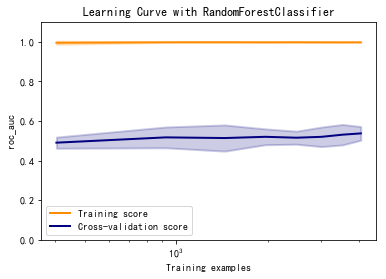

In [118]:
# 尝试了pca降维，发现对于本列来说，并不能解决过拟合现象
from sklearn.decomposition import PCA


pca = PCA(n_components=1)
pca_model = pca.fit(X)
print(pca_model.explained_variance_ratio_) 
X_new = pca_model.transform(X) 

train_sizes = np.linspace(.1, 1.0, 8)    
estimator = RandomForestClassifier()
plot_learning_curve(estimator, X_new, y, cv=10, train_sizes=train_sizes, scoring="roc_auc")

#### 正则化方法尝试      
从上述的研究可知，通过减少特征的量并不能解决过拟合的问题，   
只能通过正则化方法来解决，对于随机森林来说，就是设置树的深度、最小叶子节点     
查看1.6.1

### 采样

In [185]:
# 欠采样

from imblearn import under_sampling


X = train_data.values
y = train_label.values
y_num = y.sum()
rus = under_sampling.RandomUnderSampler(ratio = {0:int(y_num * 1),1:int(y_num)}, random_state=0)
X_res, y_res = rus.fit_sample(X, y)


In [1]:
333.5*5

1667.5

In [188]:
# train_sizes = np.linspace(.1, 1.0, 8)    
# estimator = RandomForestClassifier()
# # estimator = tree.DecisionTreeClassifier() 
# plot_learning_curve(estimator, X_res, y_res, cv=10, train_sizes=train_sizes, scoring="roc_auc")
    

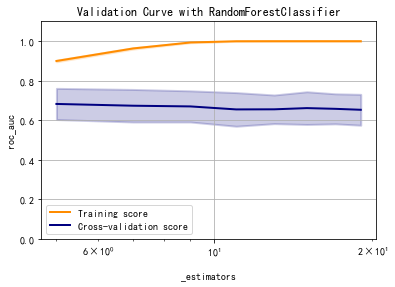

In [187]:
estimator = RandomForestClassifier(n_estimators=100)  #max_depth = 5, class_weight = {0:0.1, 1:0.5}
param_name="max_depth"
param_range = np.array(list(range(5,20,2)))

plot_validation_curve(estimator, X_res, y_res, param_name, param_range, cv=10, scoring="roc_auc")

In [189]:
# 过采样
from imblearn import over_sampling

X = train_data.values
y = train_label.values
y_num = y.sum()
rus = over_sampling.RandomOverSampler(random_state=0)
X_res, y_res = rus.fit_sample(X, y)


In [192]:
# train_sizes = np.linspace(.1, 1.0, 8)    
# # estimator = RandomForestClassifier()
# estimator = tree.DecisionTreeClassifier() 
# plot_learning_curve(estimator, X_res, y_res, cv=10, train_sizes=train_sizes, scoring="roc_auc")

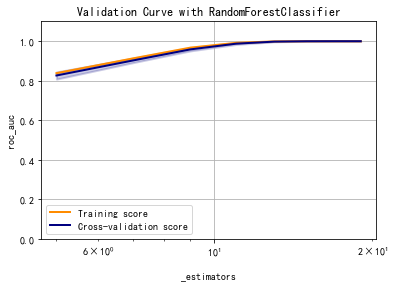

In [193]:
estimator = RandomForestClassifier(n_estimators=100)  #max_depth = 5, class_weight = {0:0.1, 1:0.5}
param_name="max_depth"
param_range = np.array(list(range(5,20,2)))

plot_validation_curve(estimator, X_res, y_res, param_name, param_range, cv=10, scoring="roc_auc")

虽然过采样后的效果很好，但当把数据分成训练集、测试集后，对训练集过采样后建模，   
然后对测试集进行预测，效果非常差，说明模型过拟合了，泛化能力非常差

# 10折交叉验证

In [30]:
# 10折交叉验证

from sklearn.cross_validation import StratifiedKFold
from sklearn import tree
from sklearn import metrics
import copy
from sklearn.ensemble import RandomForestClassifier


# X = train_data.values
# y = train_label.values

X = train_data.values
y = train_label.values



results = []
n_splits = 10
skf = StratifiedKFold(y, n_folds=n_splits, random_state=None, shuffle=True)
i = 1
for train_index, test_index in skf:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
#     clf = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=10)  # ,max_depth =10, min_samples_leaf=15
    clf = RandomForestClassifier(n_estimators = 100, n_jobs=6, min_samples_leaf=70, class_weight = {0:0.1, 1:0.6})  #
#     clf = GaussianNB()
#     clf = linear_model.LogisticRegression(C=0.05)  # , class_weight = 'balanced'

#     rus = over_sampling.RandomOverSampler(random_state=0)
#     X_res, y_res = rus.fit_sample(X_train, y_train)

    clf = clf.fit(X_train, y_train)
    # 预测
#     X_test = X_train
#     y_test = y_train
    predict_proba = clf.predict_proba(X_test)[:,1]
    
#     X_train = xgb.DMatrix(X_train, label=y_train)
#     X_test = xgb.DMatrix(X_test)

#     xgb_model = xgb.train(params, X_train, 100)
#     # 预测
#     predict_proba = xgb_model.predict(X_test)
    
    predict_label = copy.deepcopy(predict_proba)
    predict_label[predict_label > 0.5] = 1.0
    predict_label[predict_label <= 0.5] = 0.0
    
    # 统计 准确率、精度、召回率、F量、AUC面积
    accuracy = metrics.accuracy_score(y_test, predict_label)
    precision = metrics.precision_score(y_test, predict_label)
    recall = metrics.recall_score(y_test, predict_label)
    F1 = metrics.f1_score(y_test, predict_label)
    roc_auc = metrics.roc_auc_score(y_test, predict_proba)
    
    # 累计
    results.append([accuracy, precision, recall, F1, roc_auc])
    
    # 混淆矩阵
    print ('混淆矩阵%d' % i )
    confusion_matrix = metrics.confusion_matrix(y_test, predict_label)
    confusion_matrix = pd.DataFrame(confusion_matrix, index=['t-0', 't-1'], columns=['p-0', 'p-1'])
    print (confusion_matrix)
    
    i += 1
# 计算均值

results = pd.DataFrame(results, columns=['accuracy', 'precision', 'recall', 'F1', 'roc_auc'])

# 
print ('各评价指标的均值')
print (results.mean())
results

混淆矩阵1
       p-0   p-1
t-0  34251  2749
t-1   1299   682
混淆矩阵2
       p-0   p-1
t-0  34270  2730
t-1   1337   644
混淆矩阵3
       p-0   p-1
t-0  34317  2683
t-1   1321   660
混淆矩阵4
       p-0   p-1
t-0  34176  2824
t-1   1308   673
混淆矩阵5
       p-0   p-1
t-0  34164  2836
t-1   1313   668
混淆矩阵6
       p-0   p-1
t-0  34354  2646
t-1   1342   638
混淆矩阵7
       p-0   p-1
t-0  34188  2812
t-1   1317   663
混淆矩阵8
       p-0   p-1
t-0  34196  2804
t-1   1354   626
混淆矩阵9
       p-0   p-1
t-0  34308  2691
t-1   1358   622
混淆矩阵10
       p-0   p-1
t-0  34238  2761
t-1   1333   647
各评价指标的均值
accuracy     0.895286
precision    0.191533
recall       0.329360
F1           0.242187
roc_auc      0.762262
dtype: float64


,accuracy,precision,recall,F1,roc_auc
0,0.896155,0.198776,0.344271,0.252033,0.770449
1,0.895667,0.190871,0.325088,0.240523,0.763759
2,0.897283,0.197427,0.333165,0.247934,0.766635
3,0.894000,0.192451,0.339727,0.245710,0.764430
4,0.893564,0.190639,0.337203,0.243573,0.760189
5,0.897691,0.194275,0.322222,0.242401,0.760054
6,0.894074,0.190791,0.334848,0.243080,0.758912
7,0.893330,0.182507,0.316162,0.231423,0.760615
8,0.896124,0.187745,0.314141,0.235027,0.757500
9,0.894969,0.189847,0.326768,0.240163,0.760077


In [ ]:
# 测试集
各评价指标的均值
accuracy     0.949285
precision    0.746378
recall       0.003181
F1           0.006332
roc_auc      0.759688

# 训练集
各评价指标的均值
accuracy     0.949314
precision    0.748125
recall       0.003624
F1           0.007212
roc_auc      0.828067


# class_weight = {0:0.1, 1:0.6}
# 训练集
各评价指标的均值
accuracy     0.949043
precision    0.488961
recall       0.065085
F1           0.114866
roc_auc      0.829228
# 测试集

各评价指标的均值
accuracy     0.948341
precision    0.437318
recall       0.058066
F1           0.102398
roc_auc      0.761471

In [ ]:
# 逻辑回归
# 训练集
各评价指标的均值
accuracy     0.890204
precision    0.936042
recall       0.585647
F1           0.720467
roc_auc      0.855833

# 测试集
各评价指标的均值
accuracy     0.884357
precision    0.925511
recall       0.570000
F1           0.701488
roc_auc      0.827706
dtype: float64
    
# 随机森林
# 测试集
各评价指标的均值
accuracy     0.873906
precision    0.890818
recall       0.546807
F1           0.673865
roc_auc      0.817264

# 训练集
各评价指标的均值
accuracy     0.880067
precision    0.912312
recall       0.556819
F1           0.691264
roc_auc      0.845117

In [31]:
train_data.shape

(389803, 37)

In [29]:
from sklearn.externals import joblib

clf = RandomForestClassifier(n_estimators = 100, n_jobs=6, min_samples_leaf=70, class_weight = {0:0.1, 1:0.6})  # ,max_depth =10, min_samples_leaf=15
clf = clf.fit(train_data,train_label)
# 保存模型
joblib.dump(clf,'D:/work/Precision_marketing/gameover/chuangqi/chuangqi_RF_clickmodel_1.pkl')

['D:/work/Precision_marketing/gameover/chuangqi/chuangqi_RF_clickmodel_1.pkl']

(389803, 37)


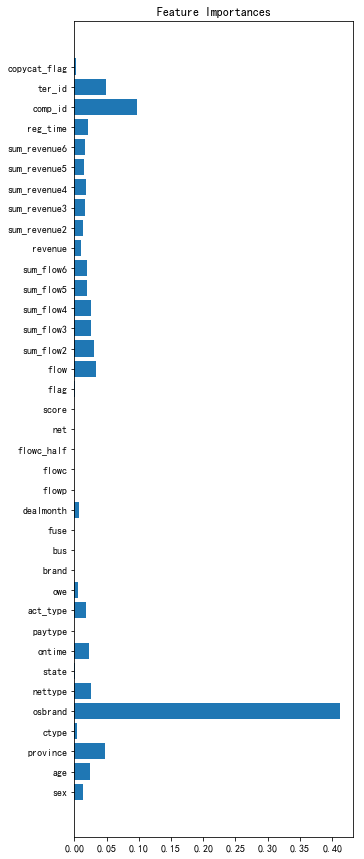

In [12]:
# 查看各特征的重要性
# 特征重要性
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# feature_names = ['sex', 'age', 'province', 'ctype', 'osbrand', 'nettype', 'state', 'ontime', 'paytype', 'act_type',
#                 'owe', 'brand', 'bus', 'fuse', 'dealmonth', 'flowp', 'flowc', 'flowc_half', 'net', 'score',
#                 'flag', 'flow', 'sum_flow2', 'sum_flow3', 'sum_flow4', 'sum_flow5', 'sum_flow6', 'revenue', 'sum_revenue2', 'sum_revenue3',
#                 'sum_revenue4', 'sum_revenue5', 'sum_revenue6', 'reg_time', 'comp_id']
X = train_data.values
print(X.shape)
y = train_label.values
rf = RandomForestClassifier(n_estimators = 100, n_jobs=6, min_samples_leaf=29)
rf.fit(X, y)
plt.figure(figsize = (5, 15))
# f, ax = plt.subplots(figsize=(15, 5))
plt.barh(range(len(rf.feature_importances_)),rf.feature_importances_)
# ax.bar(feature_names, rf.feature_importances_)
# ax.set_title("Feature Importances")
plt.title("Feature Importances")
# X轴标题
index = np.arange(len(rf.feature_importances_))
plt.yticks(index, train_data.columns.values)
# ax.set_xticks(index, list(train_data.columns.values))
plt.show()


# 不同算法的比较

针对同一数据源，比较逻辑回归、随机森林、xgboost的效果



在使用逻辑回归前，需要对分类离散型变量进行one-hot编码   
#分类离散型特征        
discrete_features = ['sex', 'province', 'ctype', 'osbrand', 'nettype', 'state',           
                     'paytype', 'act_type', 'owe', 'brand', 'bus', 'fuse',             
                      'flowp', 'flowc', 'flowc_half', 'flag', 'comp_id', 'ter_id', 'copycat_flag']        
#连续特征离散化            
continuous_features = ['age', 'ontime', 'dealmonth', 'score', 'flow', 'sum_flow2', 'sum_flow3',            
                'sum_flow4', 'sum_flow5', 'sum_flow6', 'revenue', 'sum_revenue2', 'sum_revenue3', 'sum_revenue4',                
                'sum_revenue5', 'sum_revenue6', 'reg_time']          

In [280]:
train_data.head()

,sex,age,province,ctype,osbrand,nettype,state,ontime,paytype,act_type,...,revenue,sum_revenue2,sum_revenue3,sum_revenue4,sum_revenue5,sum_revenue6,reg_time,comp_id,ter_id,copycat_flag
0,,,,,,,,,,,,,,,,,,,,,
13127757577,1,5,24,1,1,3,1,8,1,2,...,3,4,4,5,6,6,9,1,501,0
15509590499,1,3,19,1,1,3,1,6,1,1,...,2,2,3,3,4,5,4,1,501,0
15613210502,1,3,9,2,1,3,1,8,1,1,...,4,6,6,7,8,9,2,1,501,0
17604896791,1,3,18,1,1,3,1,6,1,1,...,3,4,4,5,5,6,4,1,501,0
17681799863,1,3,30,1,3,3,1,5,1,1,...,3,4,5,5,6,6,3,5,501,0


In [281]:
# one-hot 编码

#分类离散型特征
discrete_features = ['sex', 'province', 'ctype', 'osbrand', 'nettype', 'state',
'paytype', 'act_type', 'owe', 'brand', 'bus', 'fuse',
'flowp', 'flowc', 'flowc_half', 'flag', 'comp_id', 'ter_id', 'copycat_flag']

#连续特征离散化
continuous_features = ['age', 'ontime', 'dealmonth', 'score', 'flow', 'sum_flow2', 'sum_flow3',
'sum_flow4', 'sum_flow5', 'sum_flow6', 'revenue', 'sum_revenue2', 'sum_revenue3', 'sum_revenue4',
'sum_revenue5', 'sum_revenue6', 'reg_time']

train_data_onehot = train_data[continuous_features]
# 分类离散型特征one-hot 编码
for feature_one in discrete_features:
    print (feature_one)
    dummy_one = pd.get_dummies(train_data[feature_one], prefix=feature_one)
    train_data_onehot = pd.concat([train_data_onehot, dummy_one], axis=1)

sex
province
ctype
osbrand
nettype
state
paytype
act_type
owe
brand
bus
fuse
flowp
flowc
flowc_half
flag
comp_id
ter_id
copycat_flag


In [282]:
train_data_onehot.head()

,age,ontime,dealmonth,score,flow,sum_flow2,sum_flow3,sum_flow4,sum_flow5,sum_flow6,...,ter_id_6,ter_id_64,ter_id_67,ter_id_7,ter_id_70,ter_id_76,ter_id_88,ter_id_97,copycat_flag_0.1,copycat_flag_0
0,,,,,,,,,,,,,,,,,,,,,
13127757577,5,8,2,5,2,4,6,7,8,9,...,0,0,0,0,0,0,0,0,0,1
15509590499,3,6,5,5,10,14,14,14,14,14,...,0,0,0,0,0,0,0,0,0,1
15613210502,3,8,5,5,9,11,14,14,14,14,...,0,0,0,0,0,0,0,0,0,1
17604896791,3,6,5,5,10,14,14,14,14,14,...,0,0,0,0,0,0,0,0,0,1
17681799863,3,5,5,5,9,10,11,13,13,14,...,0,0,0,0,0,0,0,0,0,1


## 学习曲线, 查看训练集数量的变化对结果的影响

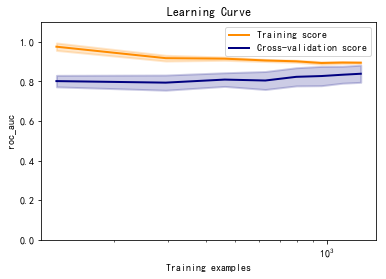

In [283]:

from sklearn import linear_model
# 逻辑回归
X = train_data_onehot.values
y = train_label.values
train_sizes = np.linspace(.1, 1.0, 8)    
estimator = linear_model.LogisticRegression() 
plot_learning_curve(estimator, X, y, cv=10, train_sizes=train_sizes, scoring="roc_auc")
    

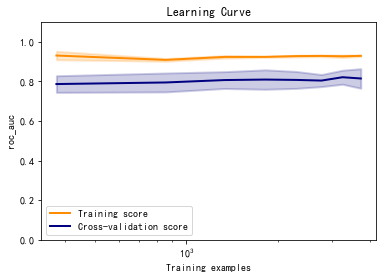

In [326]:
# 随机森林   自己变换的数据集
from sklearn.ensemble import RandomForestClassifier

X = train_data.values
y = train_label.values 

train_sizes = np.linspace(.1, 1.0, 8)    
estimator = RandomForestClassifier(min_samples_leaf=10) 
plot_learning_curve(estimator, X, y, cv=10, train_sizes=train_sizes, scoring="roc_auc")


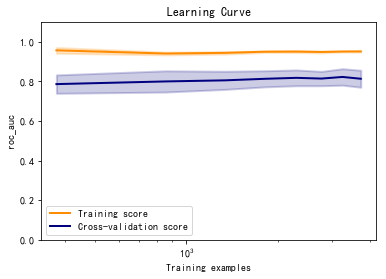

In [327]:
# 随机森林 dmp数据集
from sklearn.ensemble import RandomForestClassifier

X = train_data.values
y = train_label.values 

train_sizes = np.linspace(.1, 1.0, 8)    
estimator = RandomForestClassifier(min_samples_leaf=6) 
plot_learning_curve(estimator, X, y, cv=10, train_sizes=train_sizes, scoring="roc_auc")


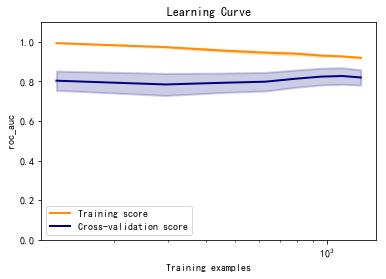

In [288]:
# xgboost
import xgboost as xgb

X = train_data.values
y = train_label.values 

X_train = xgb.DMatrix(X, label=y)

train_sizes = np.linspace(.1, 1.0, 8)    
estimator = xgb.XGBClassifier()
plot_learning_curve(estimator, X, y, cv=10, train_sizes=train_sizes, scoring="roc_auc")


从学习曲线上来看，逻辑回归的过拟合现象要比随机森林、xgboost好，   
且逻辑回归在测试集上的auc值与xgboost差不多， 都比随机森林的要高    

In [35]:
14*3

42

D:\anzhuang\anaconda3\lib\site-packages\matplotlib\mathtext.py:866: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
D:\anzhuang\anaconda3\lib\site-packages\matplotlib\mathtext.py:867: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


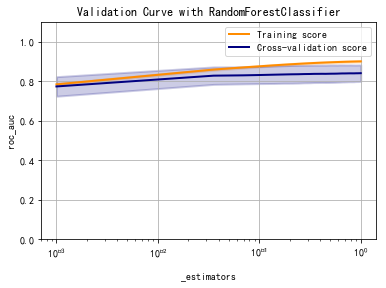

In [285]:
# 验证曲线   
# 逻辑回归
from sklearn import linear_model

X = train_data_onehot.values
y = train_label.values

estimator = linear_model.LogisticRegression(class_weight = 'balanced') 
param_name="C"
param_range = np.linspace(.001, 1.0, 30)  
plot_validation_curve(estimator, X, y, param_name, param_range, cv=10, scoring="roc_auc")

